# 将三维聚类结果可视化

In [1]:
import pandas as pd
import numpy as np
import pyproj

In [2]:
df = pd.read_csv('18000+30+7.csv',sep=",")
dfsave = pd.read_csv('dfsave.csv',sep=",")

In [3]:
df.head()

,Unnamed: 0,longitude,latitude,crt_time,cluster
0,696781,7.625598e+06,1.050342e+07,1900-01-01 09:25:17,1
1,751778,7.592606e+06,1.045309e+07,1900-01-01 17:59:46,2
2,1119674,7.533278e+06,1.042871e+07,1900-01-01 16:40:54,-1
3,429255,7.476516e+06,1.051981e+07,1900-01-01 13:10:53,3
4,124846,7.606978e+06,1.052168e+07,1900-01-01 19:02:23,4


In [4]:
dfsave.head()

,Unnamed: 0,longitude,latitude,crt_time
0,696781,120.328015,36.077513,1900-01-01 09:25:17
1,751778,120.017036,36.278547,1900-01-01 17:59:46
2,1119674,119.888992,36.608373,1900-01-01 16:40:54
3,429255,120.536221,36.869309,1900-01-01 13:10:53
4,124846,120.460126,36.166997,1900-01-01 19:02:23


In [5]:
df['longitude'] = dfsave['longitude']
df['latitude'] = dfsave['latitude']
df['value'] = 1
df.head()

,Unnamed: 0,longitude,latitude,crt_time,cluster,value
0,696781,120.328015,36.077513,1900-01-01 09:25:17,1,1
1,751778,120.017036,36.278547,1900-01-01 17:59:46,2,1
2,1119674,119.888992,36.608373,1900-01-01 16:40:54,-1,1
3,429255,120.536221,36.869309,1900-01-01 13:10:53,3,1
4,124846,120.460126,36.166997,1900-01-01 19:02:23,4,1


In [6]:
df['cluster'].value_counts().head()

-1     29505
 1      8746
 19     3765
 23     3524
 20     3460
Name: cluster, dtype: int64

In [7]:
num = [1,19,23,20]
df_choose = df[df.cluster.isin(num)] 

In [8]:
df_choose

,Unnamed: 0,longitude,latitude,crt_time,cluster,value
0,696781,120.328015,36.077513,1900-01-01 09:25:17,1,1
12,1372601,120.448560,36.370250,1900-01-01 10:24:09,1,1
14,296759,120.365009,36.808370,1900-01-01 18:00:56,23,1
31,662106,120.472042,36.438520,1900-01-01 17:36:07,19,1
33,579870,119.949118,36.786661,1900-01-01 08:26:20,20,1
...,...,...,...,...,...,...
99974,133602,120.420180,36.170258,1900-01-01 17:01:16,19,1
99977,1316209,120.296836,36.362041,1900-01-01 07:57:24,1,1
99988,1166433,119.969767,36.803405,1900-01-01 08:24:16,20,1
99991,898827,120.514303,36.873002,1900-01-01 19:47:35,23,1


In [9]:
df_choose['cluster'].value_counts()

1     8746
19    3765
23    3524
20    3460
Name: cluster, dtype: int64

In [10]:
t = df_choose['crt_time'].values
for i in range(len(t)):
    a = str(t[i])[-8:]
    t[i] = int(int(a[0:2])*10000+int(a[3:5])*1000/6+int(a[6:8])*10/6)
t

array([94195, 104015, 180093, ..., 84026, 197891, 75383], dtype=object)

In [11]:
df_choose['crt_time']
dftime = df_choose

In [12]:
def plot_clusters(df, output_name):#聚类图像
    import matplotlib.pyplot as plt

    labels = df['cluster'].values
    X = df[['longitude', 'latitude']].values

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('ST-DSCAN: #n of clusters {}'.format(len(unique_labels)))
    plt.show()
    # plt.savefig(output_name)

In [13]:
plot_clusters(df_choose, 123)

<Figure size 640x480 with 1 Axes>

In [14]:
df_c1 = df[df.cluster == 1]
df_c2 = df[df.cluster ==19]
df_c3 = df[df.cluster == 23]
df_c4 = df[df.cluster == 20]
df_c1

,Unnamed: 0,longitude,latitude,crt_time,cluster,value
0,696781,120.328015,36.077513,1900-01-01 09:25:17,1,1
12,1372601,120.448560,36.370250,1900-01-01 10:24:09,1,1
41,500756,120.359503,36.115833,1900-01-01 08:51:08,1,1
67,793941,120.410050,36.401384,1900-01-01 08:40:53,1,1
71,656822,120.436503,36.407573,1900-01-01 07:53:19,1,1
...,...,...,...,...,...,...
99947,841771,120.150447,36.036917,1900-01-01 08:28:31,1,1
99954,903611,120.452209,36.371184,1900-01-01 09:09:13,1,1
99962,454620,120.301673,36.060994,1900-01-01 09:06:56,1,1
99977,1316209,120.296836,36.362041,1900-01-01 07:57:24,1,1


In [15]:
# df_c1.to_csv('c1.csv')
# df_c2.to_csv('c2.csv')
# df_c3.to_csv('c3.csv')
# df_c4.to_csv('c4.csv')

In [16]:
df_c1['latitude'].describe()

count    8746.000000
mean       36.281104
std         0.116076
min        35.775413
25%        36.187454
50%        36.299401
75%        36.381917
max        36.573686
Name: latitude, dtype: float64

In [17]:
dftime = df_choose[['longitude','latitude','cluster']].reset_index()
ti = pd.DataFrame(t)
dftime['time'] = ti
dftime

,index,longitude,latitude,cluster,time
0,0,120.328015,36.077513,1,94195
1,12,120.448560,36.370250,1,104015
2,14,120.365009,36.808370,23,180093
3,31,120.472042,36.438520,19,176011
4,33,119.949118,36.786661,20,84366
...,...,...,...,...,...
19490,99974,120.420180,36.170258,19,170193
19491,99977,120.296836,36.362041,1,79540
19492,99988,119.969767,36.803405,20,84026
19493,99991,120.514303,36.873002,23,197891


In [33]:
x = list(dftime['longitude'].values)
y = list(dftime['latitude'].values)
z = list(dftime['time'].values)
cl = list(dftime['cluster'].values)
co =[]
mk =[]
print(len(cl))
for i in range(len(cl)):
    if cl[i] == 1:
        co.append('#F91B1B')
        mk.append('o')
    elif cl[i] == 19:
        co.append('darkorange')
        mk.append('v')
    elif cl[i] == 23:
        co.append('darkblue')
        mk.append('+')
    elif cl[i] == 20:
        co.append('lime')
        mk.append('x')
print(len(co))

19495
19495


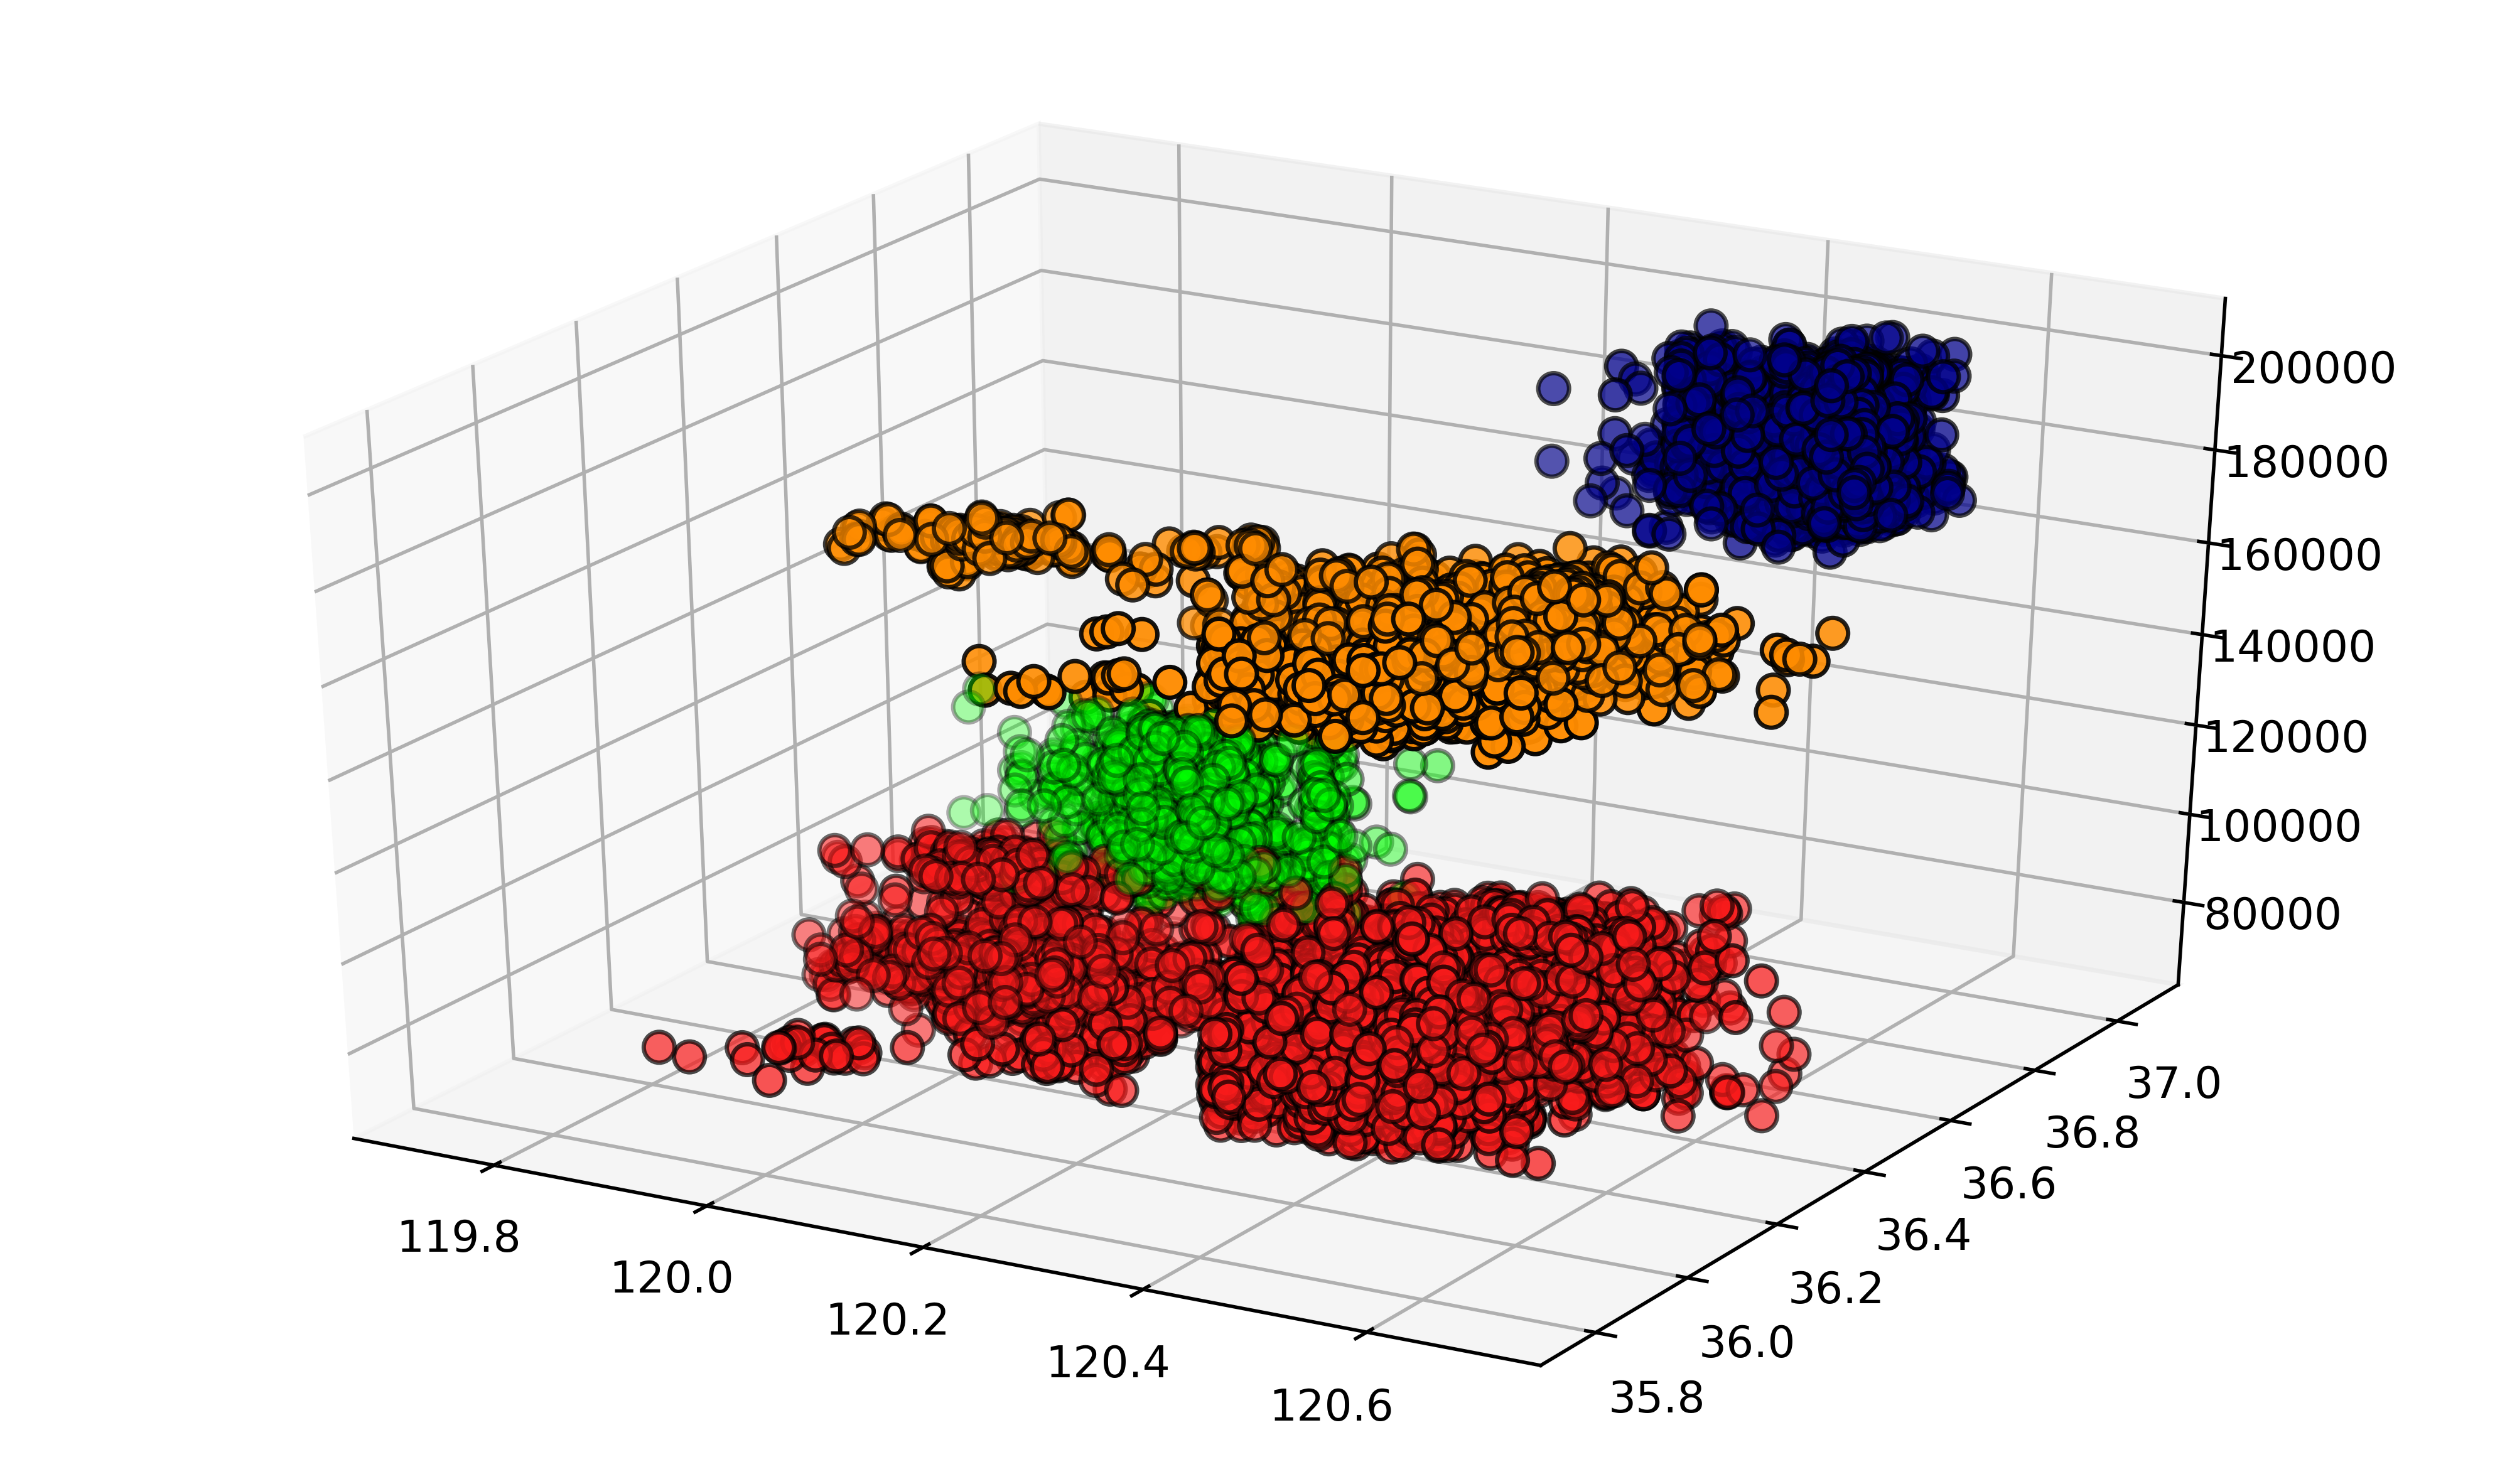

<Figure size 5000x3000 with 0 Axes>

In [34]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = plt.axes(projection='3d')
#ax2 = plt.axes(projection='3d')

ax1.scatter3D(x,y,z, c=co,edgecolors='black',linewidths=1,s=50)  #绘制散点图
#ax2.scatter3D(x2,y2,z2, c='orange')  #绘制散点图
plt.rcParams['figure.figsize'] = (10,6) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] =500 
plt.show()
plt.savefig('result.jpg')